In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import Imputer


from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation

from modules import gbvoid_dataset as gbvoid

In [4]:
void_reg=pd.read_csv('/home/estanislao/Documents/ML_GB/GrainLearning/output/void_vp_df.csv',index_col=0)
void_reg.head()

,misorientation,Length,Trace,Sigma,Distance_Center,Void_id,x_junction,y_junction,Pred_lenght,Junction,Void_Parameter
0,55.90,2.000,180.0,4.36676,630.941584,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,9.33,1.155,150.0,5.88679,622.477160,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,32.61,1.155,30.0,5.81996,603.104097,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,7.38,1.155,30.0,5.68624,574.944824,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,41.18,1.155,150.0,4.41218,548.559794,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [5]:
X=void_reg.drop('Void_Parameter',axis=1).values
y=void_reg['Void_Parameter'].values

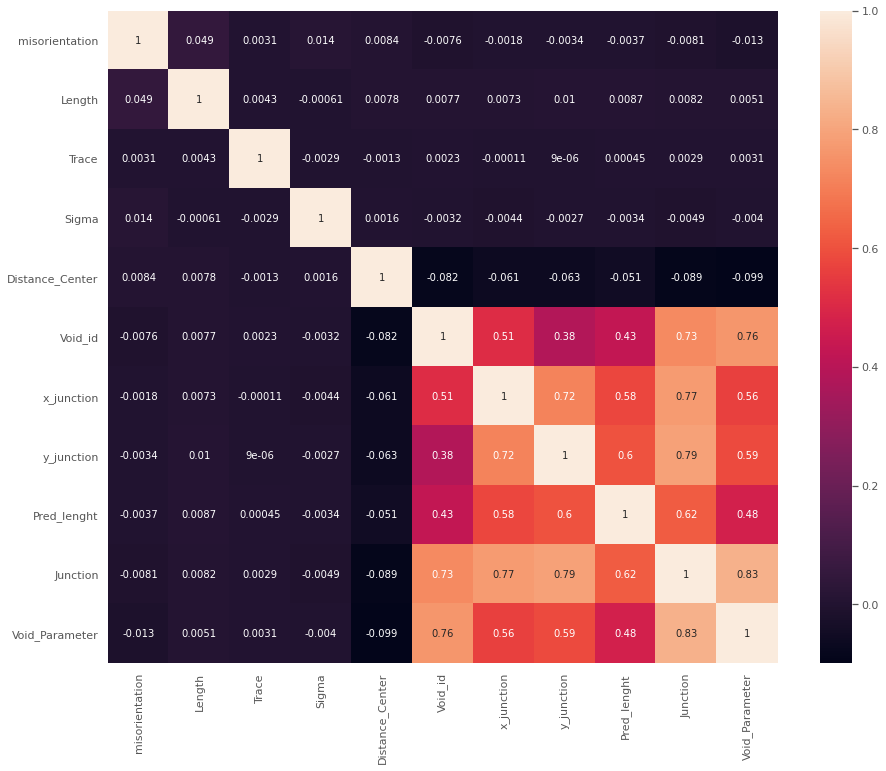

In [6]:
sns.set(rc={'figure.figsize':(15,12)})
plt.style.use('ggplot')
corrMatrix = void_reg.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21) # 70% training and 30% test

In [8]:
# Import LinearRegression
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


NameError: name 'X_fertility' is not defined

In [45]:
from sklearn.metrics import mean_squared_error

#Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.016597711726168085
Root Mean Squared Error: 0.09209170728086023


In [47]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.02186647  0.02342039  0.02086649  0.02278006 -0.00825957 -0.02407228
  0.02201223  0.01182835  0.01339885  0.0203571 ]
Average 10-Fold CV Score: 0.012419809645998614


In [48]:
# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

-0.00235015112357706
0.012419809645998614


In [59]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)
gm_cv.predict(X_test)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R^2: {}".format(r2))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455.47070750782, tolerance: 0.0918573100228301
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.3071255487685, tolerance: 0.09224804944587549
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.7300886089887, tolerance: 0.0900779851971998
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/pyth

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R^2: 0.012468688281721763


/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566.9609172915507, tolerance: 0.11433910099936608
  model = cd_fast.enet_coordinate_descent(


[-0. -0.  0. -0. -0.]


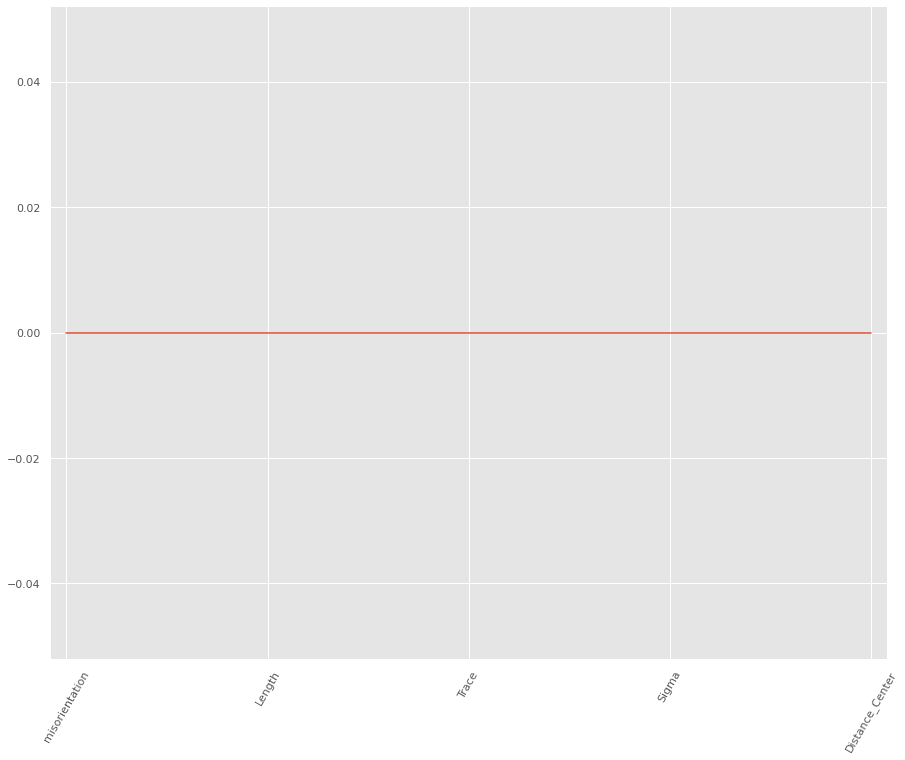

In [49]:
# Lasso and 
df_columns=void_reg.drop('Void_Parameter',axis=1).columns

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

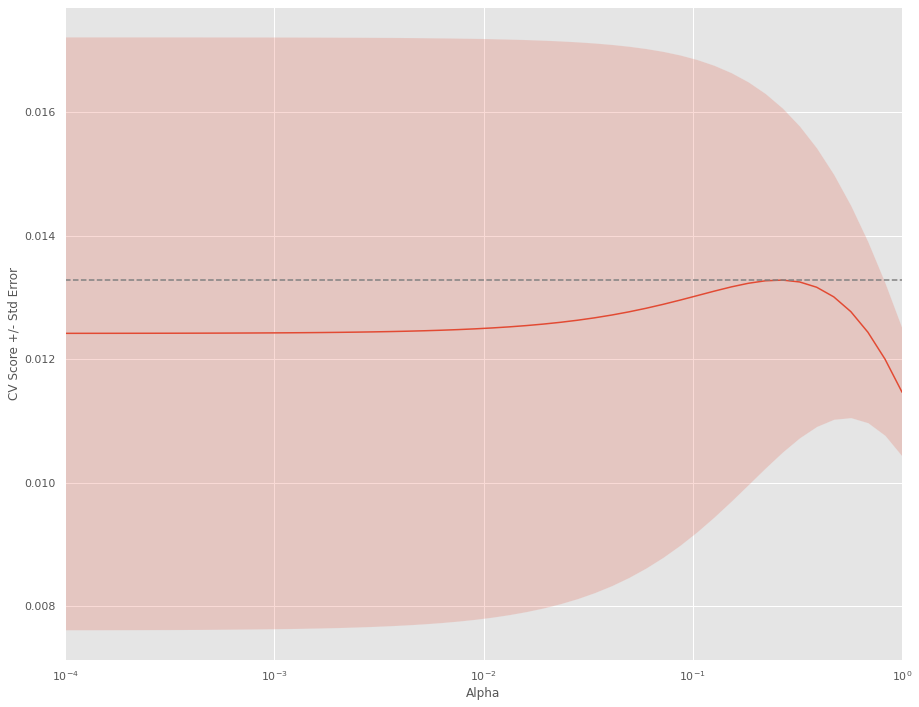

In [63]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

    
# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [60]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R^2: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.3558652994313, tolerance: 0.10252352379181644
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509.9304374906047, tolerance: 0.10367285406328056
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.7815043375541, tolerance: 0.10323689502883665
  model = cd_fast.enet_coordinate_descent(
/home/estanislao/anaconda3/envs/GBL/lib/

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R^2: 0.016563121153513216
Tuned ElasticNet MSE: 0.008481180859748473


/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.4442105536227, tolerance: 0.11433910099936608
  model = cd_fast.enet_coordinate_descent(


In [68]:
# Import necessary modules
from sklearn.preprocessing import PolynomialFeatures

#transformer = PolynomialFeatures(degree=2, include_bias=False)
#transformer.fit(x)
#x_ = transformer.transform(x)
#x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
#model = LinearRegression().fit(x_, y)
#r_sq = model.score(x_, y)
#x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)


# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y_train)

# Step 4: Get results
r_sq = model.score(x_, y_train)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 5)